In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

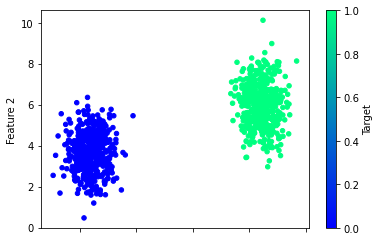

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#Creating a dataframe with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
#Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

2022-02-22 17:08:14.360516: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first dense layer, inlcuding our input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6336 - accuracy: 0.7013
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.7173
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.7307
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.7387
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7520
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7600
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7720
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7800
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7813
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7893
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9947
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9960
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1106 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9960
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9960
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9960
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9960
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9960
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9960
Epoch 92/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0964 - accuracy: 0.9960
Epoch 93/100


<AxesSubplot:>

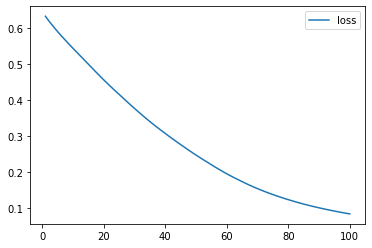

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

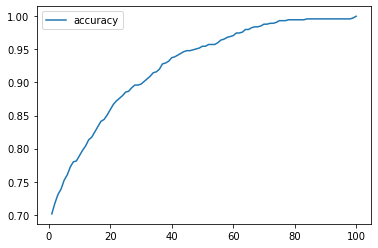

In [12]:
#Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0830 - accuracy: 1.0000 - 256ms/epoch - 32ms/step
Loss: 0.08299396187067032, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

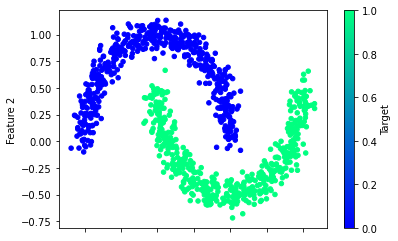

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a dataframe to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 1.3359 - accuracy: 0.3827
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1461 - accuracy: 0.4120
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0261 - accuracy: 0.4480
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9456 - accuracy: 0.4707
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8865 - accuracy: 0.4880
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.5040
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7985 - accuracy: 0.5253
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7641 - accuracy: 0.5480
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.5773
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.5867
Epoch 11/

24/24 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.8867
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.8867
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2775 - accuracy: 0.8880
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.8880
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.8880
Epoch 89/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2752 - accuracy: 0.8880
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.8893
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2742 - accuracy: 0.8893
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.8893
Epoch 93/100


<AxesSubplot:>

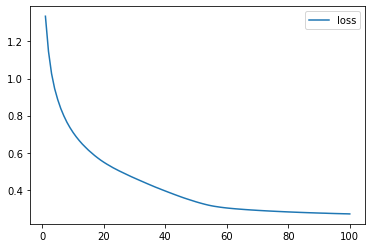

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

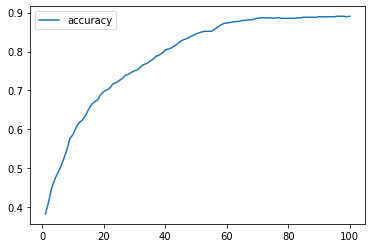

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hiden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle="True")

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7577 - accuracy: 0.4200
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5640
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6760
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7333
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7707
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7960
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.8187
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.8320
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8453
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8507
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9053
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9040
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9040
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2342 - accuracy: 0.9040
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9040
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9080
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.9053
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9067
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9067
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9053
Epoch 93/100
